# MODELO PREDICTIVO DE LEAD SCORING

###### tras finalizar con la tarea de segmentacion de leads, vamos a realizar el modelo predictivo de lead scoring

# Preselección de variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

In [2]:
ruta_proyecto = 'C:/Users/mcana/OneDrive/Escritorio/PORTAFOLIO/ML/LEAD_SCORINGLEAD_SCORING_PROYECTO'

In [3]:
nombre_df = 'df_tablon.pickle'

In [4]:
df = pd.read_pickle(ruta_proyecto + '/Datos/Tabajo/' + nombre_df)

In [5]:
df


,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.727273,0.444444,0
660728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.296655,0.125,0.727273,0.444444,0
660719,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.134243,0.050,0.545455,0.666667,0
660681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.628521,0.050,0.727273,0.777778,1
660680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.909091,0.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579697,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.16,0.447183,0.200,0.727273,1.000000,1
579642,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.779049,0.100,0.636364,1.000000,0
579615,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.092430,0.125,0.636364,1.000000,1


# métodos supervisados


In [6]:
target = 'compra'
x = df.drop(columns = target).copy()
y = df[target].copy()

### Mutual information


In [7]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

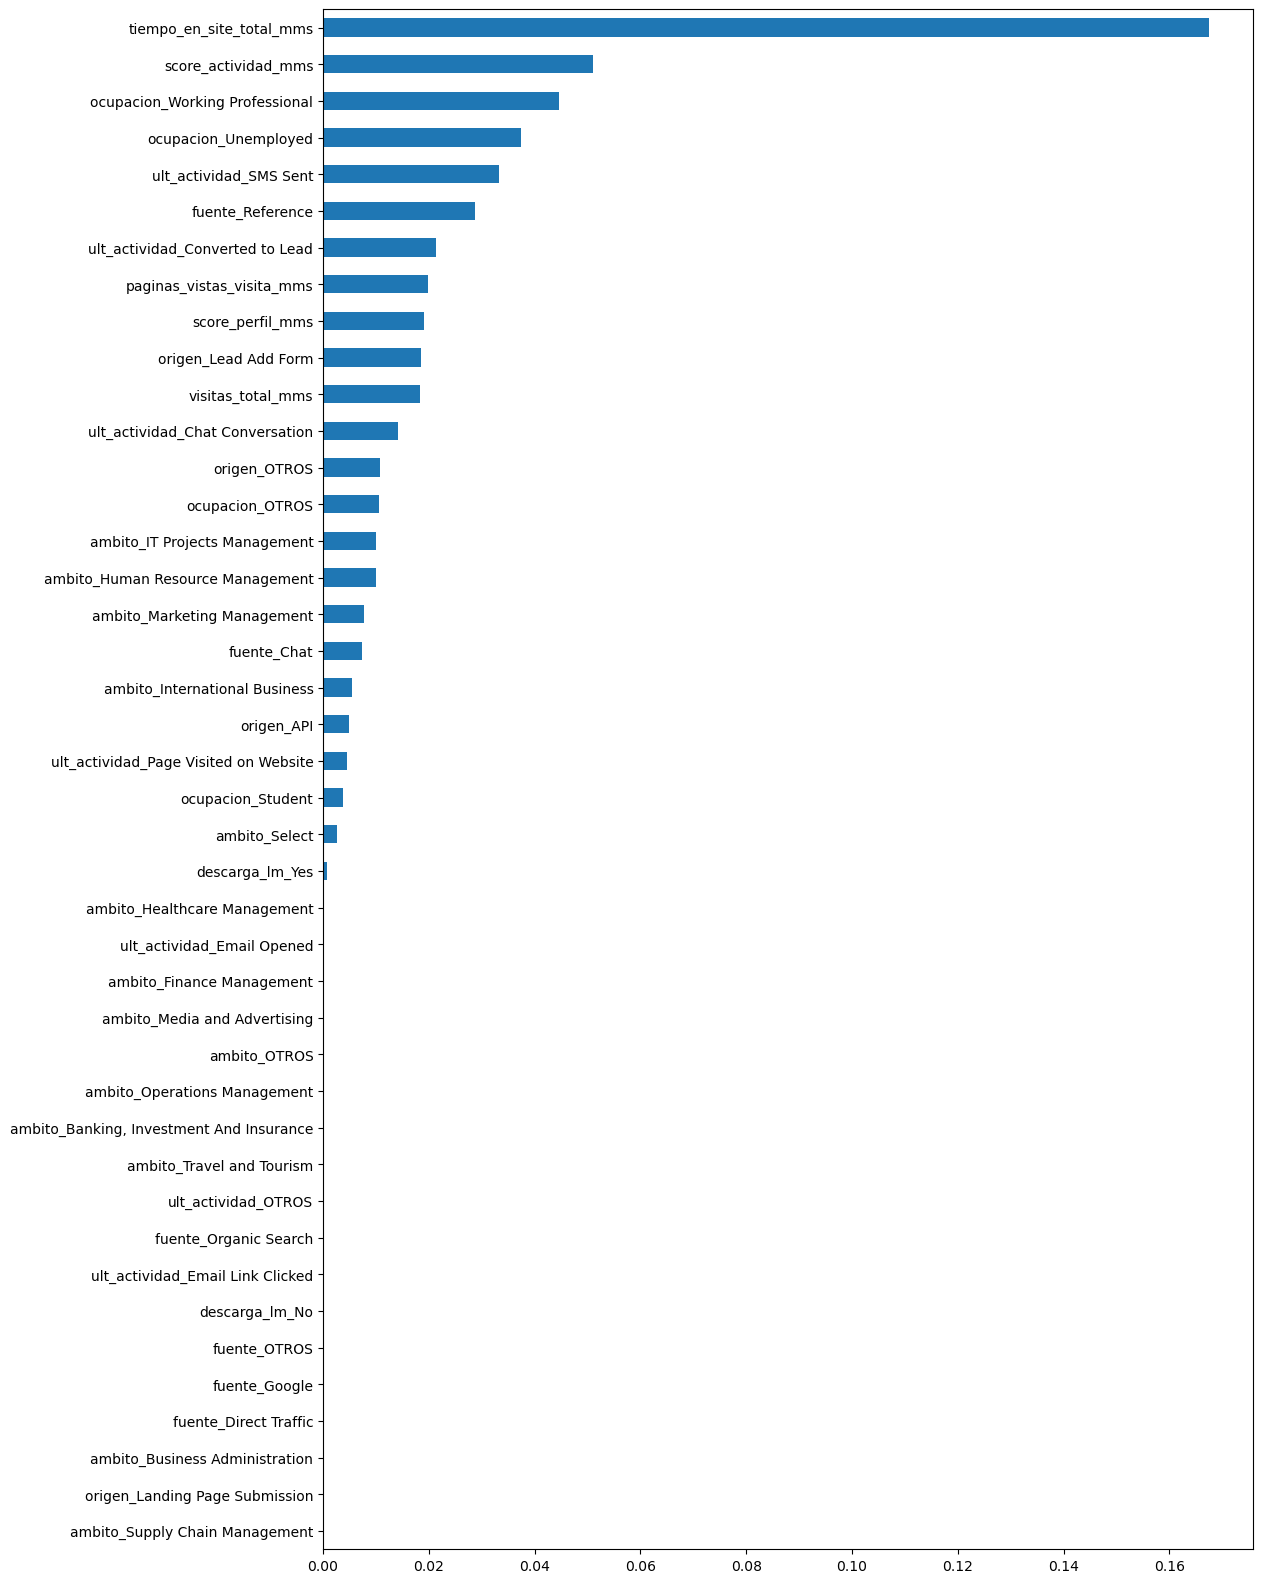

In [9]:
#calcular y revisar
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [10]:
#Quitar las que no son muy predictivas
posicion_variable_limite = 17


In [11]:
#extraer los nombres de las que entran
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

In [12]:
entran_mi

38            tiempo_en_site_total_mms
40                 score_actividad_mms
34      ocupacion_Working Professional
33                ocupacion_Unemployed
16              ult_actividad_SMS Sent
9                     fuente_Reference
11     ult_actividad_Converted to Lead
39           paginas_vistas_visita_mms
41                    score_perfil_mms
2                 origen_Lead Add Form
37                   visitas_total_mms
10     ult_actividad_Chat Conversation
3                         origen_OTROS
31                     ocupacion_OTROS
22       ambito_IT Projects Management
21    ambito_Human Resource Management
24         ambito_Marketing Management
Name: variable, dtype: object

In [ ]:
#crear el dataframe con la selección 
x_mi = x[entran_mi].copy()

In [14]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

In [15]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=-1,
                            num_parallel_tree=None, random_state=None, ...))

In [16]:
#extraer los nombres de las que entran 
entran_rfe = x.columns[rfe.support_]

In [18]:
entran_rfe

Index(['origen_Landing Page Submission', 'origen_Lead Add Form', 'fuente_Chat',
       'ult_actividad_Chat Conversation', 'ult_actividad_Converted to Lead',
       'ult_actividad_Email Link Clicked', 'ult_actividad_OTROS',
       'ult_actividad_Page Visited on Website', 'ult_actividad_SMS Sent',
       'ambito_IT Projects Management', 'ambito_Marketing Management',
       'ambito_OTROS', 'ambito_Operations Management', 'ambito_Select',
       'ocupacion_Unemployed', 'ocupacion_Working Professional',
       'descarga_lm_No', 'visitas_total_mms', 'tiempo_en_site_total_mms',
       'score_actividad_mms', 'score_perfil_mms'],
      dtype='object')

In [19]:
#crear el dataframe con la selección 
x_rfe = x[entran_rfe].copy()

#### Permutation Importance

In [20]:
#crear funciñon para mostrar el resultado
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

In [22]:
#Instanciar y entrenar
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

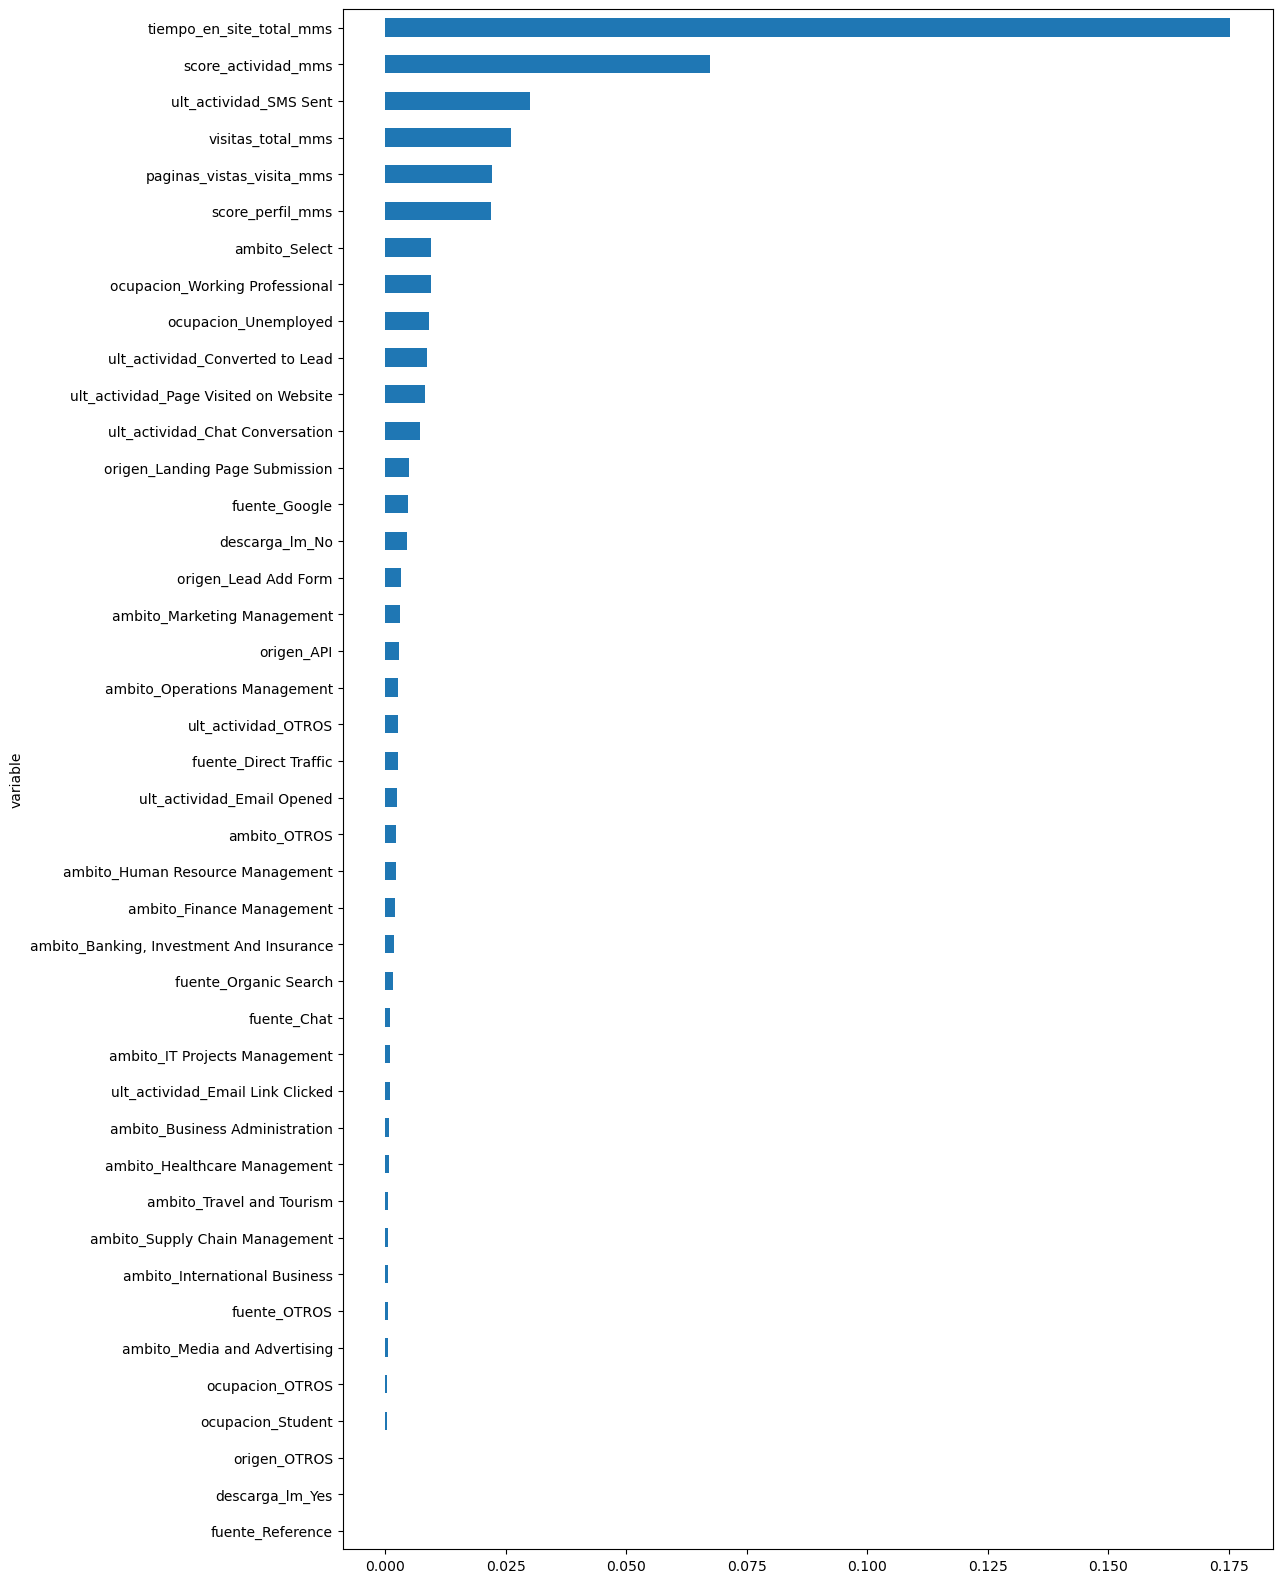

In [24]:
#revisar la salida
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

In [32]:
#SELECCIONAR LAS VARIABLES QUE PASAN 
posicion_variable_limite = 15

In [33]:
#extraer los nombres de las que entran 
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

In [34]:
entran_per

38                 tiempo_en_site_total_mms
40                      score_actividad_mms
16                   ult_actividad_SMS Sent
37                        visitas_total_mms
39                paginas_vistas_visita_mms
41                         score_perfil_mms
28                            ambito_Select
34           ocupacion_Working Professional
33                     ocupacion_Unemployed
11          ult_actividad_Converted to Lead
15    ult_actividad_Page Visited on Website
10          ult_actividad_Chat Conversation
1            origen_Landing Page Submission
6                             fuente_Google
35                           descarga_lm_No
Name: variable, dtype: object

In [35]:
#crear el dataframe con la seleccion 
x_per = x[entran_per].copy()

# SELECCIONAR EL METODO FINAL


#### de los tres, me quedo con x_per

In [36]:

# x_preseleccionado = x_mi
# x_preseleecionado = x_rfe
x_preseleccionado = x_per

# Métodos no supervisados

In [40]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.727273,0.444444,0
660728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.296655,0.125,0.727273,0.444444,0
660719,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.134243,0.050,0.545455,0.666667,0
660681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.628521,0.050,0.727273,0.777778,1
660680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.909091,0.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579697,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.16,0.447183,0.200,0.727273,1.000000,1
579642,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.779049,0.100,0.636364,1.000000,0
579615,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.092430,0.125,0.636364,1.000000,1


In [37]:
# correlacion 
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    c = df.corr().abs()
    c= c.unstack()
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

In [38]:
#calcular y revisar
cor_finales = correlaciones_fuertes(x_preseleccionado)

In [39]:
# revisar agregado 
cor_finales.var1.value_counts()

var1
ambito_Select                     3
origen_Landing Page Submission    2
ocupacion_Unemployed              1
paginas_vistas_visita_mms         1
fuente_Google                     1
score_perfil_mms                  1
Name: count, dtype: int64

In [42]:
cor_finales.head(50)

,var1,var2,corr
127,ocupacion_Unemployed,ocupacion_Working Professional,0.855091
102,ambito_Select,origen_Landing Page Submission,0.702842
63,paginas_vistas_visita_mms,visitas_total_mms,0.549214
194,origen_Landing Page Submission,descarga_lm_No,0.502167
209,fuente_Google,descarga_lm_No,0.463648
104,ambito_Select,descarga_lm_No,0.446339
87,score_perfil_mms,origen_Landing Page Submission,0.353709
95,ambito_Select,score_perfil_mms,0.350291
184,origen_Landing Page Submission,paginas_vistas_visita_mms,0.332441


- 'ocupacion' correlaciona mucho pero nos las queremos quitar porque son muy predictivas
- vamos a quitar alguna que tenga mucha correlación y que no tenga mucho poder predictivo

In [44]:
a_eliminar_corr = ['origen_Landing Page Submission', 'origen_API']

In [49]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/Datos/Tabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/Datos/Tabajo/' + 'y_preseleccionado.pickle'

In [50]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [52]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)